In [73]:
import pymc3 as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.arima_model import ARIMA

# The Data

In [74]:
true_phi_1 = -0.2
true_phi_2 = 0.5
true_sigma = 0.1

xvals = [np.random.normal(0, true_sigma), np.random.normal(0, true_sigma)]
for _ in range(50):
    xvals.append(true_phi_1*xvals[-1] + true_phi_2*xvals[-2] + np.random.normal(0, true_sigma))
xvals = np.array(xvals[2:])

df = pd.DataFrame({'value': xvals}, index=pd.date_range('2020-01-01', periods=len(xvals), freq='D'))
df

,value
2020-01-01,0.193498
2020-01-02,0.113639
2020-01-03,0.072490
2020-01-04,0.170791
2020-01-05,0.028284
2020-01-06,-0.004760
2020-01-07,-0.161762
2020-01-08,-0.044342
2020-01-09,-0.010922
2020-01-10,-0.021566


# Usual Method : Fit AR Model

In [75]:
model = ARIMA(xvals, order=(2,0,0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  53.138
Date:                Wed, 19 Apr 2023   AIC                            -98.275
Time:                        12:39:50   BIC                            -90.627
Sample:                             0   HQIC                           -95.363
                                 - 50                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0139      0.020     -0.700      0.484      -0.053       0.025
ar.L1         -0.1182      0.102     -1.162      0.245      -0.318       0.081
ar.L2          0.5277      0.140      3.764      0.000       0.253       0.802
sigma2         0.0069      0.002      4.195      0.000       0.004       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.94   Prob(JB):                         0.58
Heteroskedasticity (H):               0.79   Skew:                             0.33
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
import plotly.graph_objs as go

df['AR'] = model.fittedvalues
df['ci_lower'] = pred_ci[:,0]
df['ci_upper'] = pred_ci[:,1]

In [77]:
import plotly.graph_objs as go

# Create a trace for the AR values
trace_ar = go.Scatter(
    x=df.index, 
    y=df['AR'], 
    mode='lines', 
    name='AR'
)

# Create a trace for the lower confidence interval
trace_ci_lower = go.Scatter(
    x=df.index, 
    y=df['ci_lower'], 
    mode='lines', 
    name='Lower CI',
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)', # set the fill color
    fill='tonexty' # fill between trace and y-axis
)

# Create a trace for the upper confidence interval
trace_ci_upper = go.Scatter(
    x=df.index, 
    y=df['ci_upper'], 
    mode='lines', 
    name='Upper CI',
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)', # set the fill color
    fill='tonexty' # fill between trace and y-axis
)

# Combine the traces into a data list
data = [trace_ar, trace_ci_lower, trace_ci_upper]

# Set the layout options
layout = go.Layout(
    title='AR and Confidence Intervals',
    xaxis=dict(title='Date'),
    yaxis=dict(title='AR and CI')
)

# Create the figure object and plot the data
fig = go.Figure(data=data, layout=layout)
fig.add_trace(go.Scatter(x=df.index, y=df['value'], name='truth', line=dict(color='red')))
fig.show()

# Bayesian Analysis with PyMC3
***

# Priors:
## $\phi_1 \sim N(0,20)$
## $\phi_2 \sim N(0,20)$
## $\sigma \sim Exp(1)$
***

# Likelihood:
## $x_t|\phi_1, \phi_2, \sigma, x_{t-1}, x_{t-2} \sim N(\phi_1 x_{t-1} + \phi_2 x_{t-2}, \sigma)$
***

# Posterior
## $\phi_1, \phi_2, \sigma|x \sim ?$
***

/tmp/ipykernel_26343/911109068.py:10: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, phi]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
/tmp/ipykernel_26343/911109068.py:13: DeprecationWarning:

The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.

/home/m/miniconda3/envs/ThinkBayes2/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.

/tmp/ipykernel_26343/911109068.py:14: UserWarning:

This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.



<Figure size 700x700 with 0 Axes>

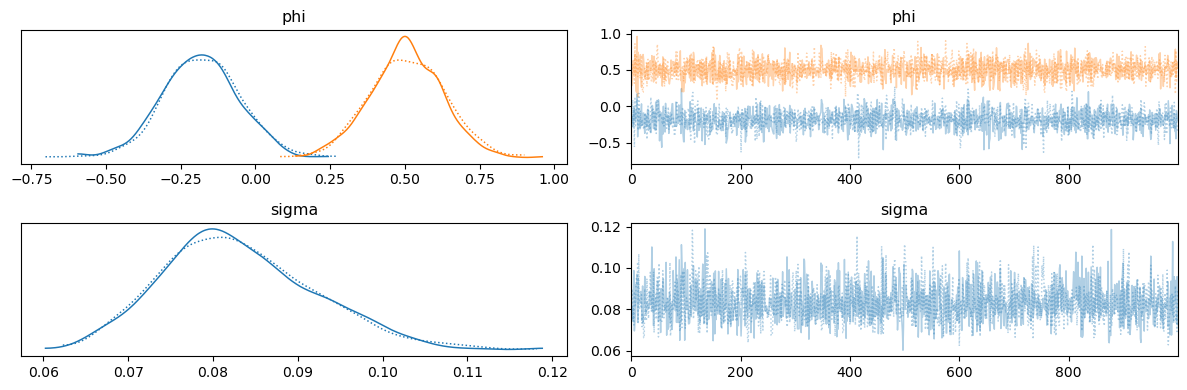

In [78]:
with pm.Model() as bayes_model:
    #priors
    phi = pm.Normal("phi", mu=0, sigma=20, shape=2)
    sigma = pm.Exponential("sigma", lam=1)

    #Likelihood
    likelihood = pm.AR("x", phi, sigma, observed=xvals)

    #posterior
    trace = pm.sample(1000, cores=2)
    
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout()

# Parameter Distributions

/tmp/ipykernel_26343/1404322737.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




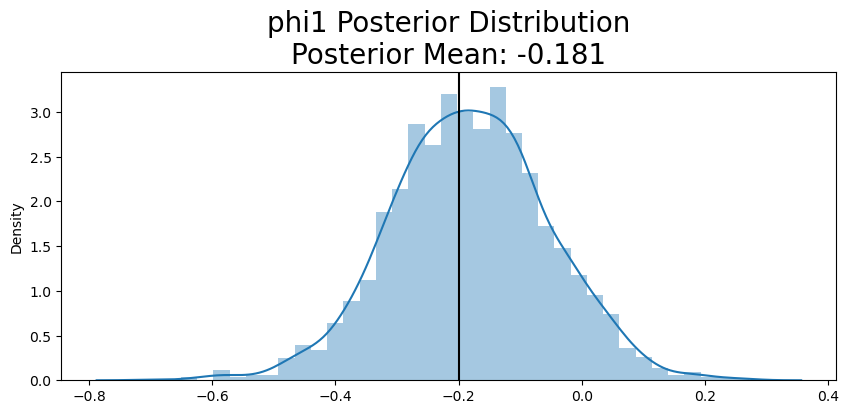

/tmp/ipykernel_26343/1404322737.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




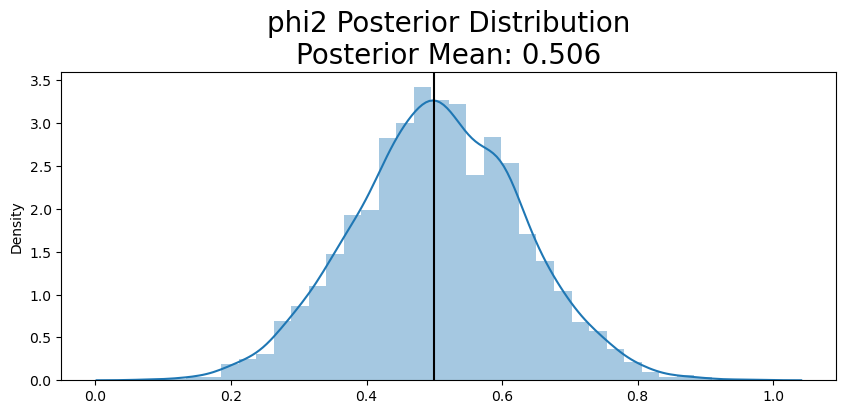

/tmp/ipykernel_26343/1404322737.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




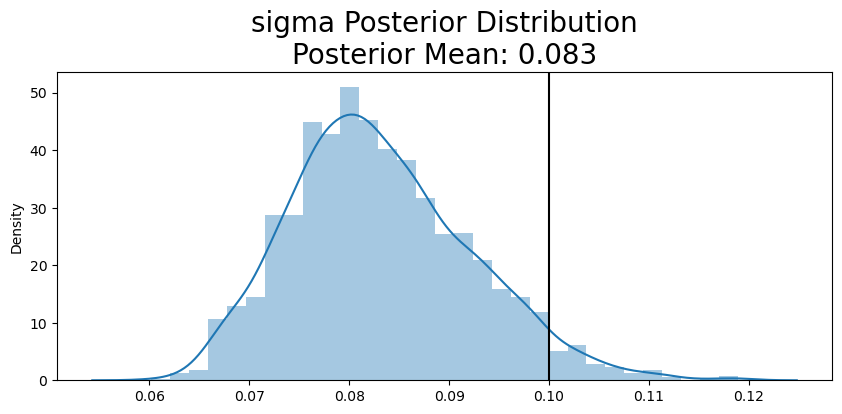

In [79]:
phi1_vals = trace.get_values('phi')[:,0]
phi2_vals = trace.get_values('phi')[:,1]
sigma_vals = trace.get_values('sigma')

plt.figure(figsize=(10,4))
sns.distplot(phi1_vals)
plt.axvline(true_phi_1, color='k')
plt.title('phi1 Posterior Distribution\nPosterior Mean: %s'%round(phi1_vals.mean(), 3), fontsize=20)
plt.show()

plt.figure(figsize=(10,4))
sns.distplot(phi2_vals)
plt.axvline(true_phi_2, color='k')
plt.title('phi2 Posterior Distribution\nPosterior Mean: %s'%round(phi2_vals.mean(), 3), fontsize=20)
plt.show()

plt.figure(figsize=(10,4))
sns.distplot(sigma_vals)
plt.axvline(true_sigma, color='k')
plt.title('sigma Posterior Distribution\nPosterior Mean: %s'%round(sigma_vals.mean(), 3), fontsize=20)
plt.show()

# Forecast Next Values

In [84]:
forecast = model.forecast(5)
forecast

array([ 0.00835521, -0.05332579,  0.00248674, -0.03665745, -0.00257985])

In [81]:
num_samples = 10000
forecasted_vals = []
num_periods = 5

for _ in range(num_samples):
    curr_vals = list(xvals.copy())
    
    phi1_val = np.random.choice(phi1_vals)
    phi2_val = np.random.choice(phi2_vals)
    sigma_val = np.random.choice(sigma_vals)
    
    for _ in range(num_periods):
        curr_vals.append(curr_vals[-1]*phi1_val + curr_vals[-2]*phi2_val + np.random.normal(0, sigma_val))
    forecasted_vals.append(curr_vals[-num_periods:]) 
forecasted_vals = np.array(forecasted_vals)

/tmp/ipykernel_26343/2452991254.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_26343/2452991254.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_26343/2452991254.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code 

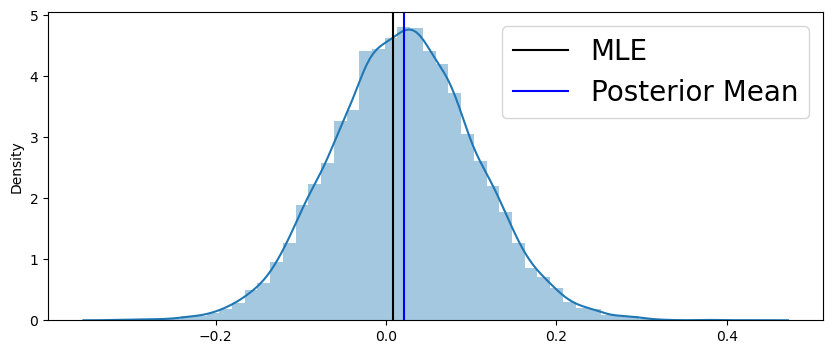

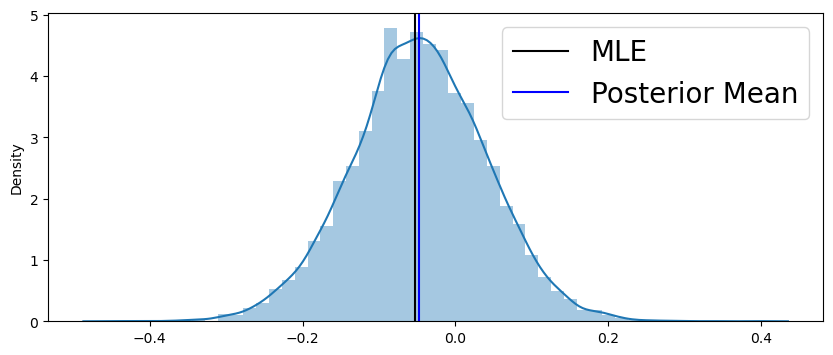

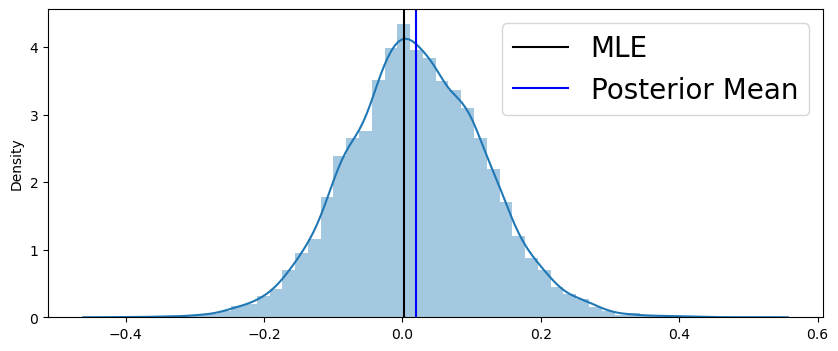

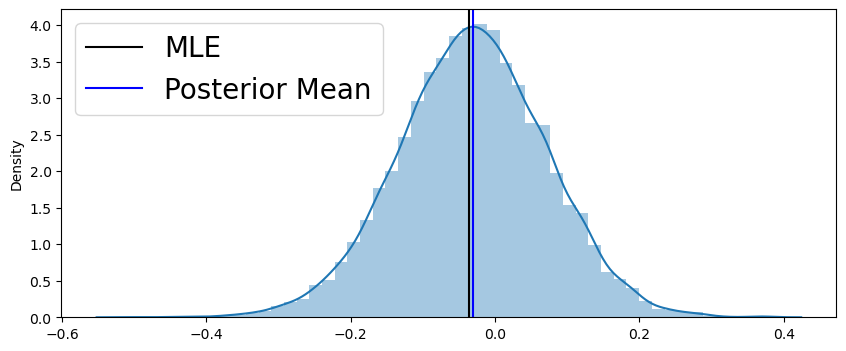

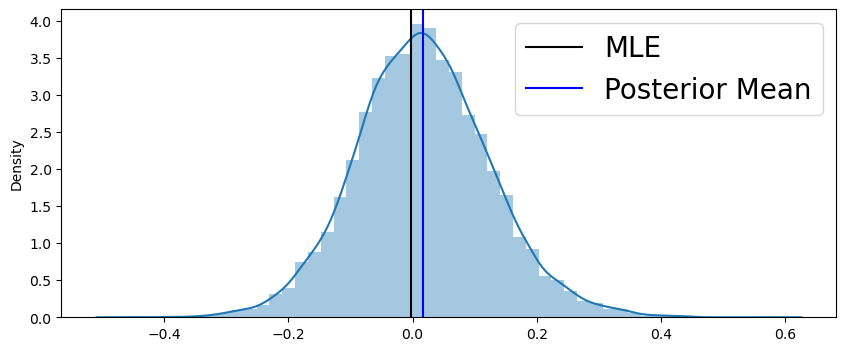

In [86]:
for i in range(num_periods):
    plt.figure(figsize=(10,4))
    vals = forecasted_vals[:,i]
    mu, dev = round(vals.mean(), 3), round(vals.std(), 3)
    sns.distplot(vals)
    p1 = plt.axvline(forecast[i], color='k')
    p2 = plt.axvline(vals.mean(), color='b')
    plt.legend((p1,p2), ('MLE', 'Posterior Mean'), fontsize=20)
    # plt.title('Forecasted t+%s\nPosterior Mean: %s\nMLE: %s\nSD Bayes: %s\nSD MLE: %s'%((i+1), mu, round(forecast[i],3), dev, round(forecast[1][i],3)), fontsize=20)